In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

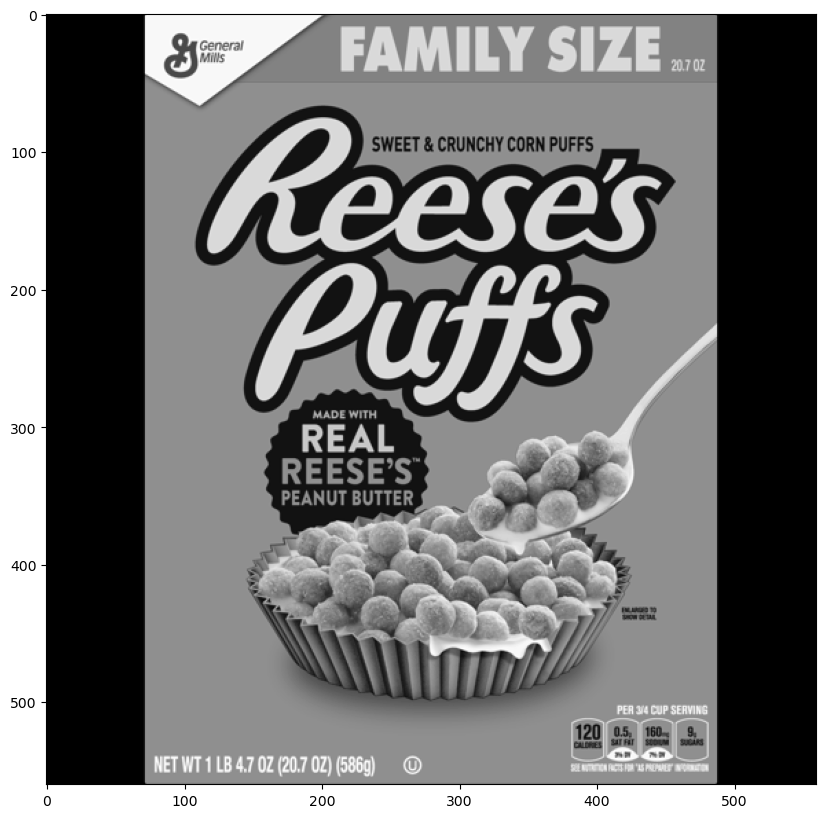

In [14]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)

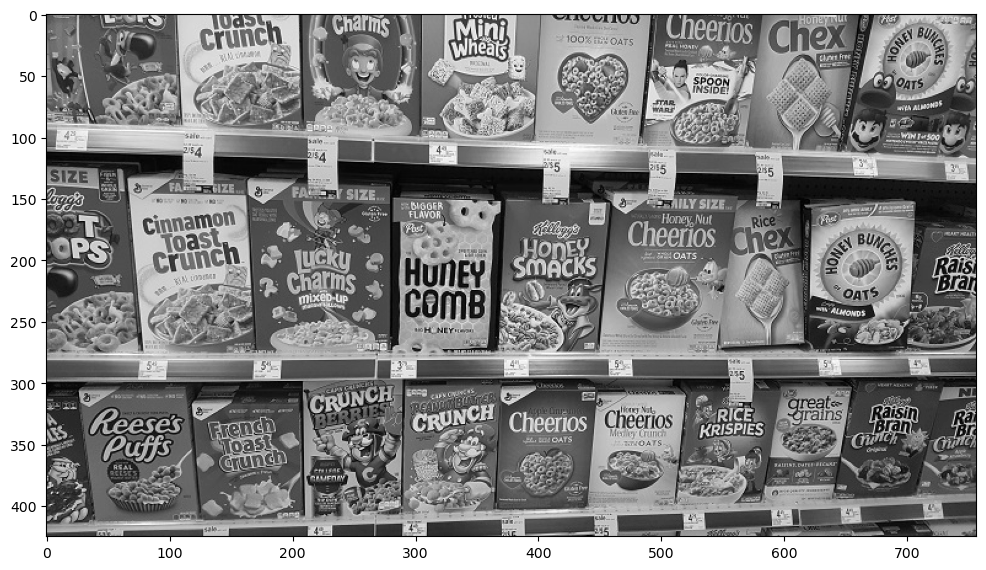

In [15]:
cerals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cerals)

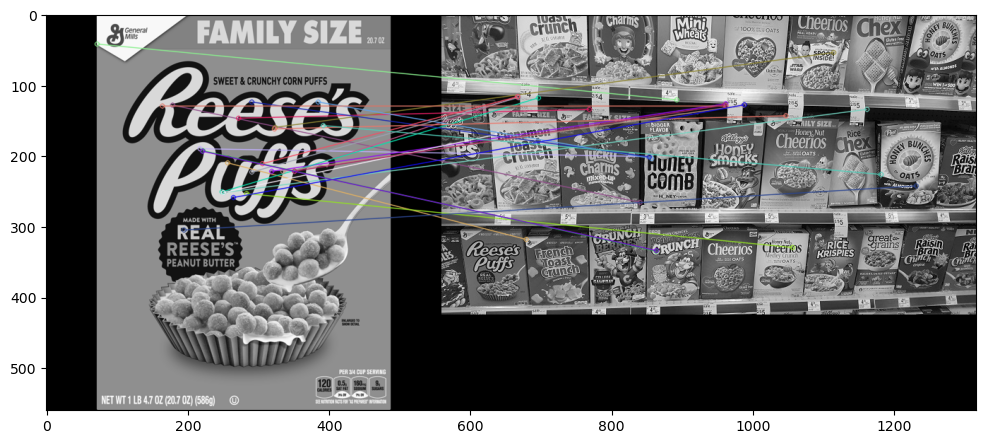

In [16]:
#Brute force detection
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cerals, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

reeses_match = cv2.drawMatches(reeses, kp1, cerals, kp2, matches[:25], None, flags=2)
display(reeses_match)

In [19]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cerals, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

In [23]:
good  = []

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

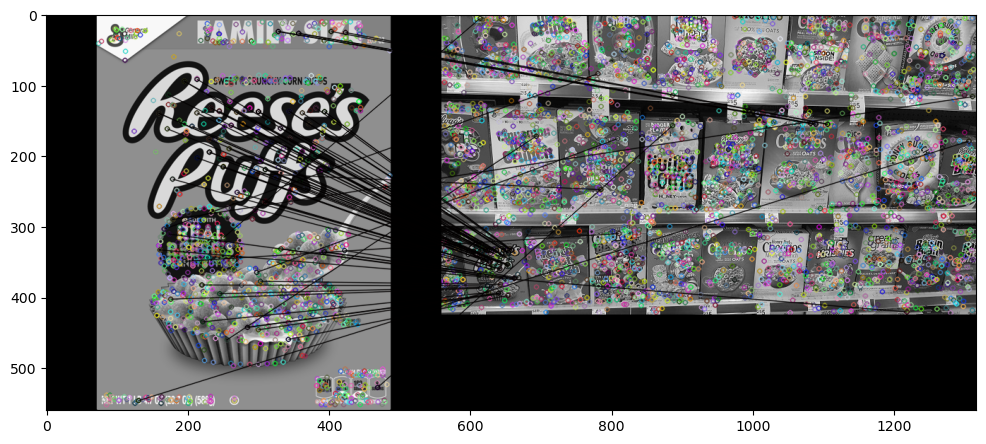

In [26]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cerals, kp2, good, None, 2)
display(sift_matches)

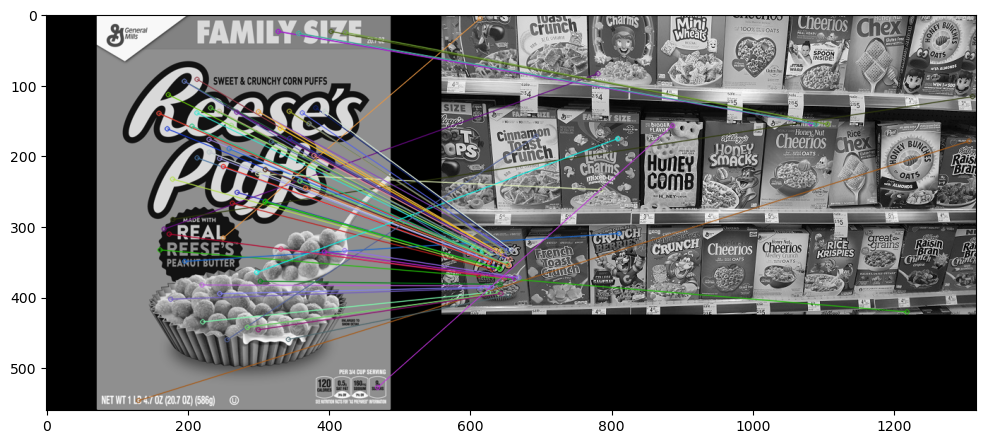

In [29]:
#FLANN
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cerals, None)

FLAN_INDEX_DTREE = 0
index_params = dict(algorithm = FLAN_INDEX_DTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2, k=2)

good =[]

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cerals,kp2, good, None, flags=2)
display(flann_matches)
    